<a href="https://colab.research.google.com/github/cyberschoolinmoscow/robofootball/blob/cv_hw/cv_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашее задание 2
* Загрузите изображение и переведите его в цветовое пространство HSV

*   Настройте цветовой фильтр на лежащих на поле роботов. Скорее всего маска получится изрядно зашумленной. Удалите шум с помощью морфологических операций, выводя все промежуточные этапы на экран. Морфологических операций на самом деле много, рекомендуем к чтению документацию https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html


*  Удалите шум с помощью фильтрации связных компонент, пользуясь указаниями в первом ответе по ссылке https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python

После выполнения закоммитьте задание в ветку cv_hw в своем репозитории.

In [120]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import math
%matplotlib inline 
from ipywidgets import interactive

ax=18
ay=15
kernel = np.ones((3,3),np.uint8)

canvas = cv2.imread('/content/sahrs_on_the_field.jpg')
 #Преобразуем в HSV
img = cv2.cvtColor(canvas, cv2.COLOR_BGR2HSV)

In [121]:
def show_res(img,ax,ay):
  plt.figure(figsize=(ax, ay))
  plt.imshow(img, cmap="gray")
  plt.show()

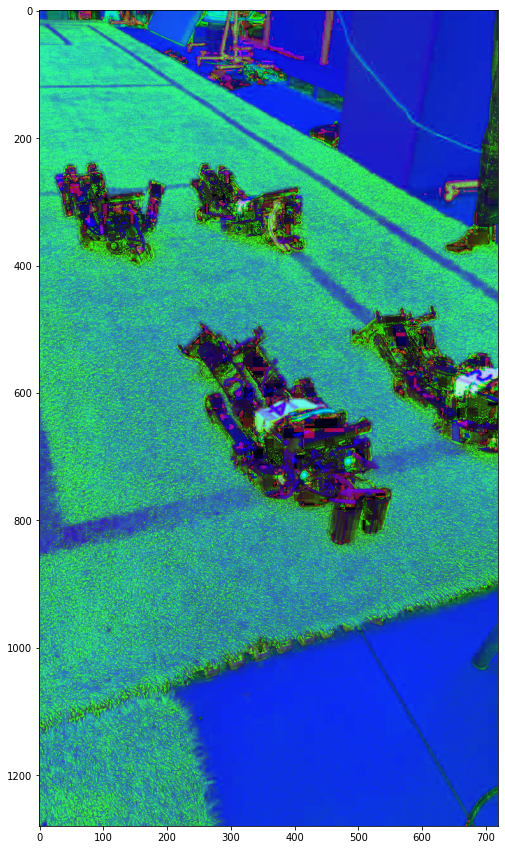

In [122]:
show_res(img, ax,ay)

In [123]:
def f(rl, gl, bl, rh, gh, bh):
  mask = cv2.inRange(img, (rl, gl, bl), (rh, gh, bh))
  show_res(mask, 5,6)
  plt.pause (0.05)
  plt.clf ()
  interactive_plot = interactive(f, rl = (0, 255, 1), gl = (0, 255, 1), bl = (0, 255, 1), rh = (0, 255, 1), gh = (0, 255, 1), bh = (0, 255, 1))
 
  output = interactive_plot.children[-1]
  interact(f, rl = (0, 255, 1), gl = (0, 255, 1), bl = (0, 255, 1), rh = (0, 255, 1), gh = (0, 255, 1), bh = (0, 255, 1))

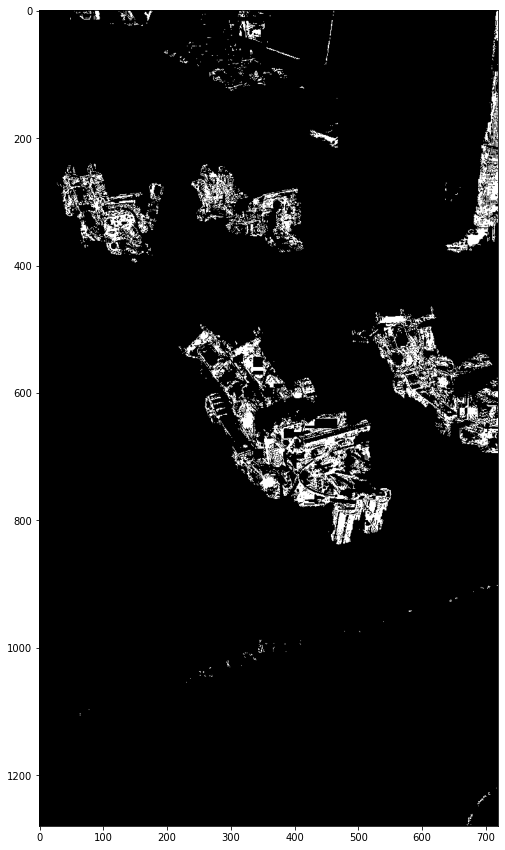

In [124]:
im1 = cv2.inRange(img, (5, 5, 5), (240, 65, 65))
show_res(im1, ax,ay)

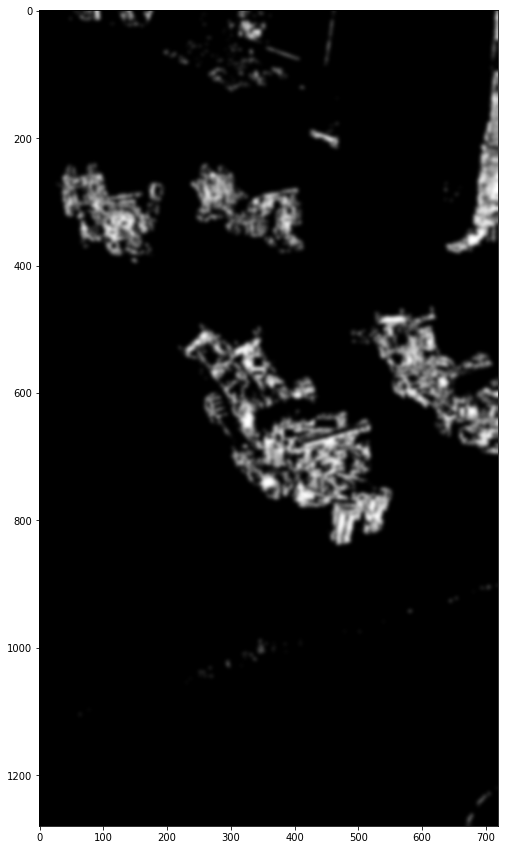

In [125]:
blur = cv2.GaussianBlur(im1, (45,45), 3)
show_res(blur, ax,ay)

In [126]:
def remove_small_objects(img, min_size=150):
        # find all your connected components (white blobs in your image)
        nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)
        # connectedComponentswithStats yields every seperated component with information on each of them, such as size
        # the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
        sizes = stats[1:, -1]
        nb_components = nb_components - 1

        # your answer image
        img2 = img
        # for every component in the image, you keep it only if it's above min_size
        for i in range(0, nb_components):
            if sizes[i] < min_size:
                img2[output == i + 1] = 0

        return img2

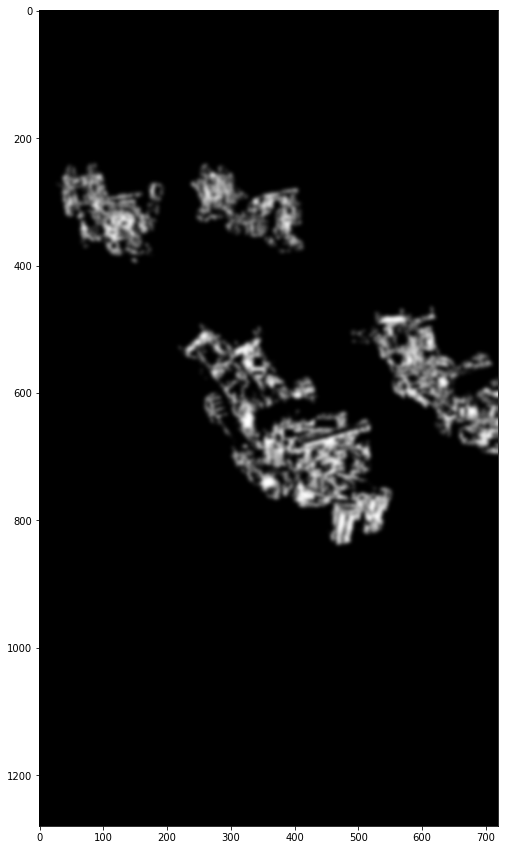

In [127]:
output = remove_small_objects(blur, 16000)
show_res(output, ax,ay)

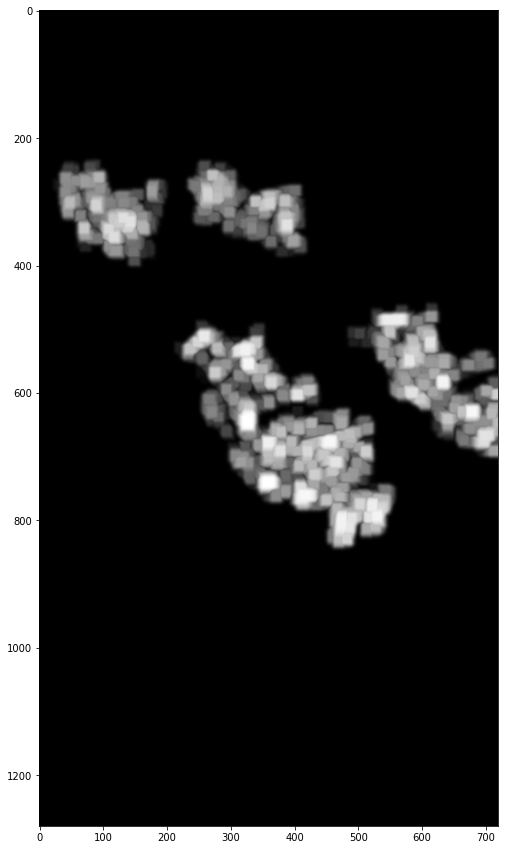

In [128]:
dilation = cv2.dilate(output,kernel,iterations =5)
show_res(dilation, ax,ay)

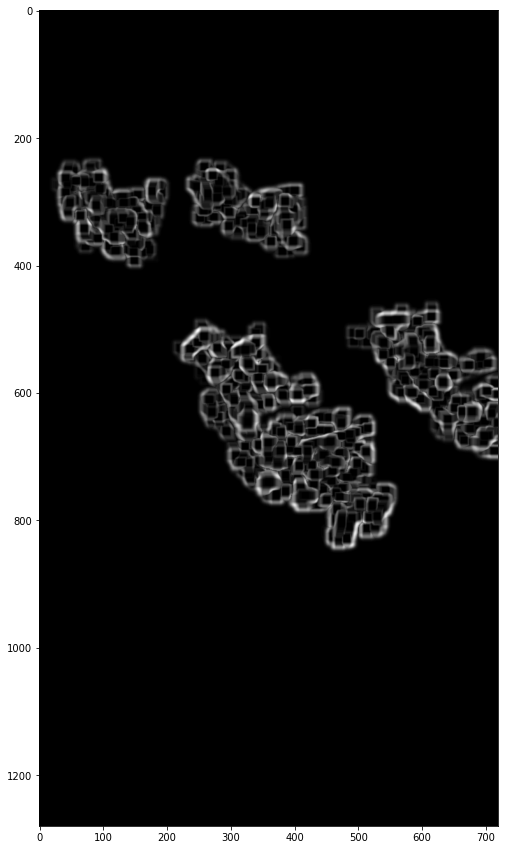

In [129]:
gradient = cv2.morphologyEx(dilation, cv2.MORPH_GRADIENT, kernel)
show_res(gradient, ax,ay)

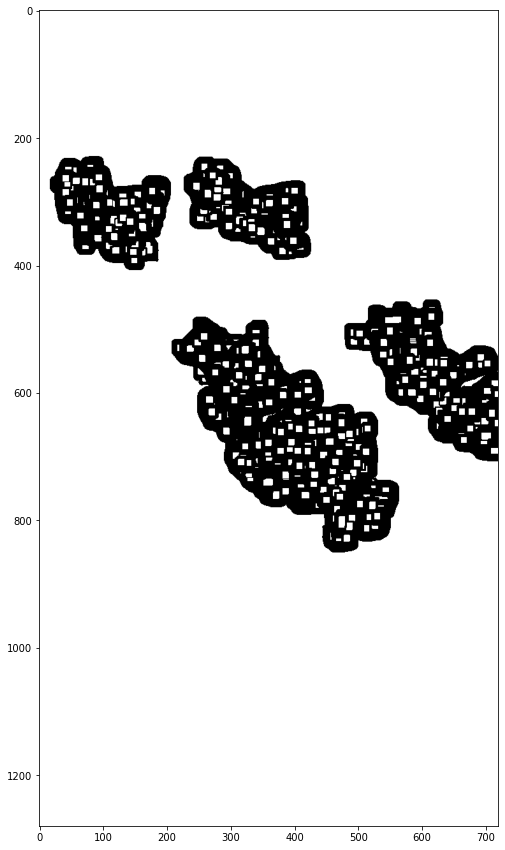

In [130]:
thresh = cv2.threshold(gradient, 1, 255, cv2.THRESH_BINARY_INV)[1]
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
show_res(thresh, ax,ay)

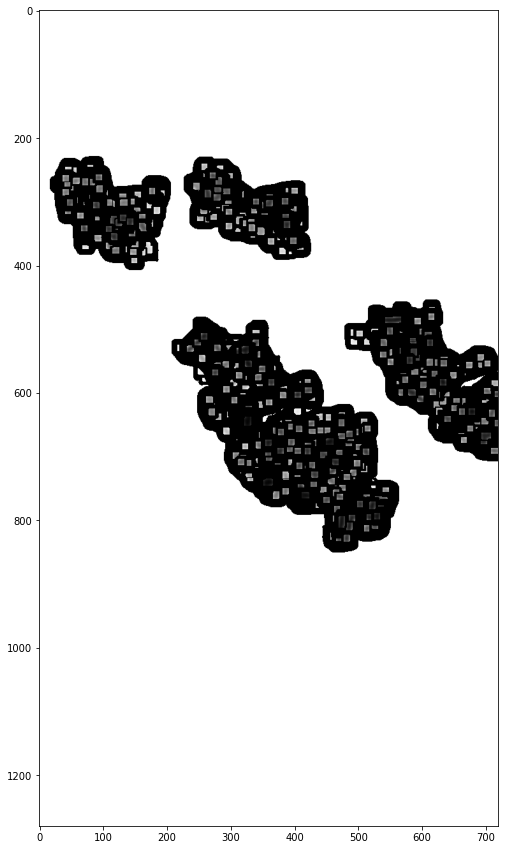

In [136]:
image9=cv2.subtract(thresh,blur)
show_res(image9, ax,ay)

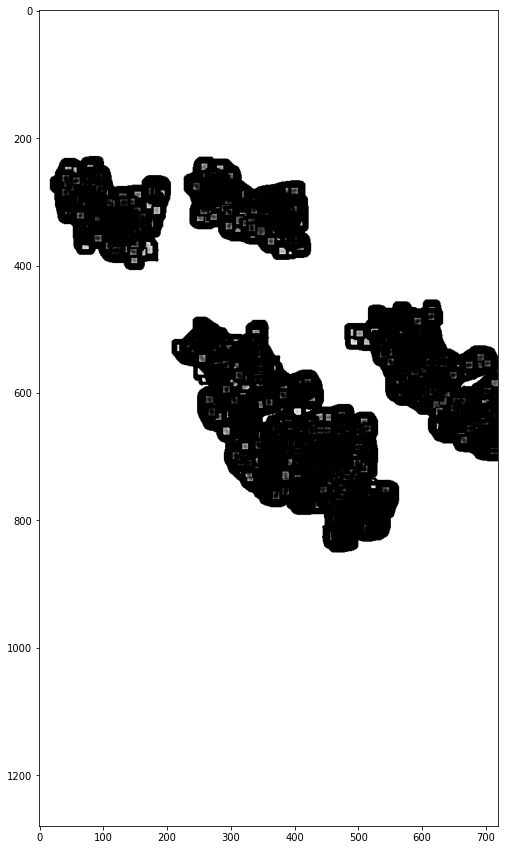

In [137]:
image10 =cv2.subtract(image9,blur)
show_res(image10, ax,ay)

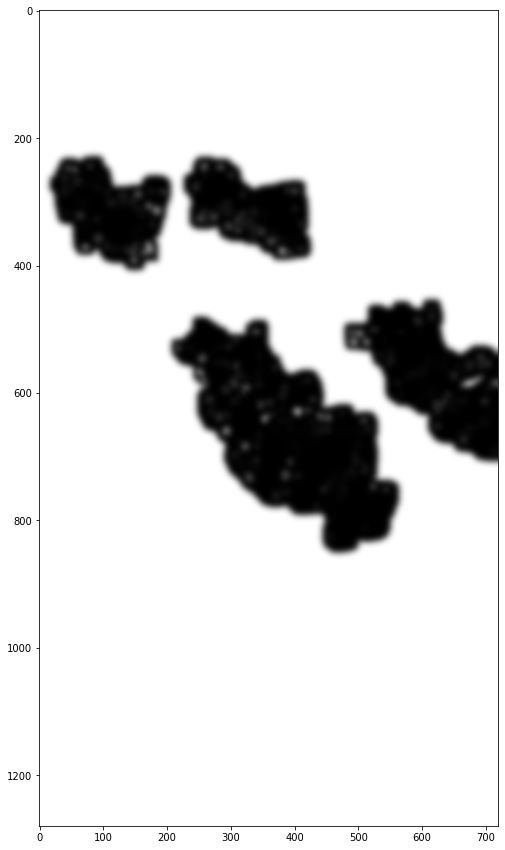

In [138]:
blur2 = cv2.GaussianBlur(image10, (45,45), 5)
show_res(blur2, ax,ay)